<a href="https://colab.research.google.com/github/FaizanFarooq3/Culinary-Geospatial-Data-Analytics/blob/main/Culinary_Geospatial_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid warnings
from warnings import filterwarnings
filterwarnings('ignore')

**Columns description**
1. url - url of the restaurant in the zomato website

2. address - address of the restaurant in Bengaluru

3. name - name of the restaurant

4. online_order - whether online ordering is available in the restaurant or not

5. book_table - table booking option available or not

6. rate - overall rating of the restaurant out of 5

7. votes - total number of rating for the restaurant as of the above mentioned date

8. phone - phone number of the restaurant

9. location - neighborhood in which the restaurant is located

10. rest_type - restaurant type

11. dish_liked - dishes people liked in the restaurant

12. cuisines - food styles, separated by comma

13. approx_cost(for two people) - approximate cost of meal for two people

14. reviews_list - list of tuples containing reviews for the restaurant

15. menu_item - list of menus available in the restaurant

16. listed_in(type) - type of meal

17. listed_in(city) - neighborhood in which the restaurant is listed

In [ ]:
#read dataset
df = pd.read_csv('zomato.txt')
df.head()

In [16]:
# Try using the 'python' engine and handling bad lines
df = pd.read_csv('zomato.txt', engine='python', on_bad_lines='skip')

df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [17]:
df.shape

(5827, 17)

In [18]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [19]:
len(df['name'].unique())

2939

In [20]:
df.isna().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                            799
votes                             0
phone                           106
location                          1
rest_type                        24
dish_liked                     3332
cuisines                          5
approx_cost(for two people)      13
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

**Getting all NAN features**

In [21]:

feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [23]:
#% of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 13.712 % missing values
phone has 1.8191 % missing values
location has 0.0172 % missing values
rest_type has 0.4119 % missing values
dish_liked has 57.1821 % missing values
cuisines has 0.0858 % missing values
approx_cost(for two people) has 0.2231 % missing values


In [24]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5'], dtype=object)

In [25]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [26]:
df.shape

(5028, 17)

In [27]:
def split(x):
    return x.split('/')[0]

In [28]:
df['rate']=df['rate'].apply(split)

In [29]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [30]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1'], dtype=object)

In [31]:
df.replace('NEW',0,inplace=True)

In [32]:
df.replace('-',0,inplace=True)

In [33]:
df['rate']=df['rate'].astype(float)

**Calculate avg. rating of each resturant**

<Axes: xlabel='name'>

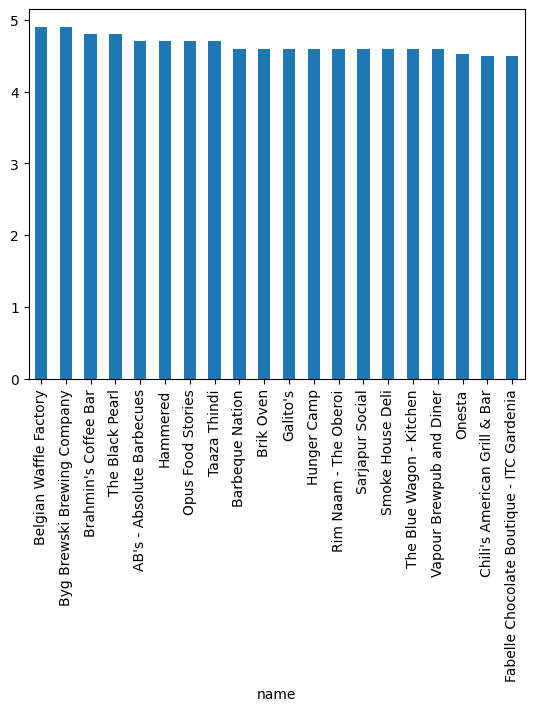

In [34]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

In [35]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate.head(20)

restaurant  rating
0                                #FeelTheROLL    3.40
1                                     #refuel    3.70
2                               1441 Pizzeria    4.10
3                                        1947    4.06
4                            1980s Games Cafe    3.40
5                                20 Feet High    4.00
6   21 C - La Marvella Sarovar Premiere Hotel    3.60
7                     24 Carats - The Capitol    3.10
8                           24/7 Food Service    3.00
9                                   24th Main    4.10
10                                    3 Spice    3.90
11              360 Atoms Restaurant And Cafe    3.10
12                     36th Cross Coffee Mane    3.60
13                              4th Tea Block    4.00
14                         50-50 EATING HOUSE    3.20
15                             55 Wall Street    3.90
16                                   7 Plates    3.90
17                    70 Brigade - Iris Hotel    3.90
18                                    8 Slice    3.70
19                                99 Pancakes    4.10

In [36]:
df_rate.shape

(2487, 2)

**Alternative - Create a list with all restaurants and, in another list, all ratings, and then, by using zip, create a dataframe**

In [37]:
'''restaurant=[]
avg_rating=[]
for key,name_df in df.groupby('name'):
    restaurant.append(key)
    avg_rating.append(np.mean(name_df['rate'])'''

"restaurant=[]\navg_rating=[]\nfor key,name_df in df.groupby('name'):\n    restaurant.append(key)\n    avg_rating.append(np.mean(name_df['rate'])"

In [38]:
'''df_rate=pd.DataFrame(zip(restaurant,avg_rating))
df_rate.columns=['restaurant','rating']
df_rate.head(20)'''

"df_rate=pd.DataFrame(zip(restaurant,avg_rating))\ndf_rate.columns=['restaurant','rating']\ndf_rate.head(20)"

In [39]:
'''df_rate.shape'''

'df_rate.shape'

**Rating distribution**

<Axes: xlabel='rating', ylabel='Density'>

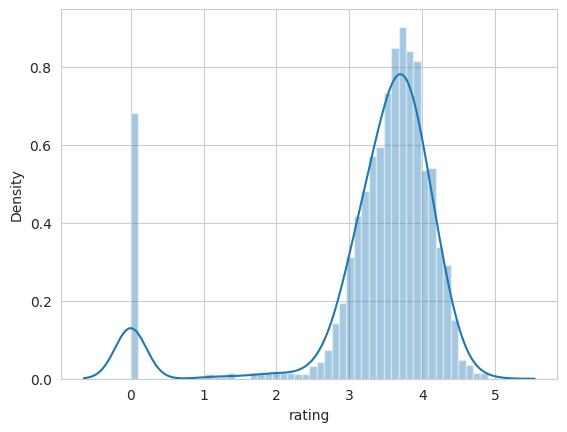

In [40]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

**Nearly 50% percent of restaurants have ratings between three and four. Rarely do restaurants receive ratings above 4.5**

**Top restaurant chains in Bangaluru**

Text(0.5, 0, 'Number of outlets')

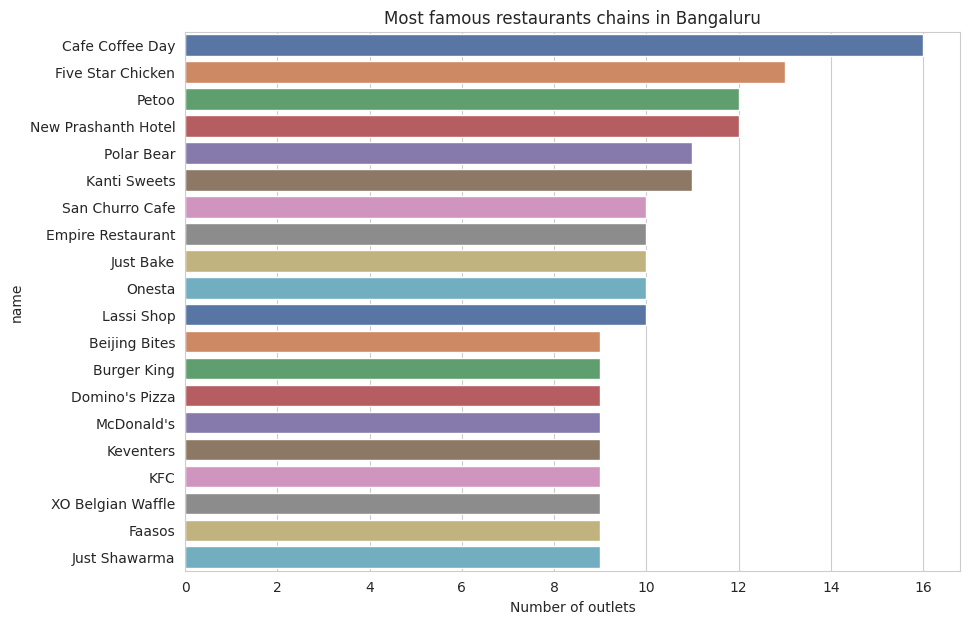

In [41]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

**How many of the restuarants do not accept online orders?**

([<matplotlib.patches.Wedge at 0x7f7058b617b0>,
 [Text(-0.637859034917273, 0.8961784708273265, ''),
  Text(0.6958462199097524, -0.977649240902538, '')],
 [Text(-0.34792310995487613, 0.48882462045126895, '69.7%'),
  Text(0.4059102949473555, -0.5702953905264805, '30.3%')])

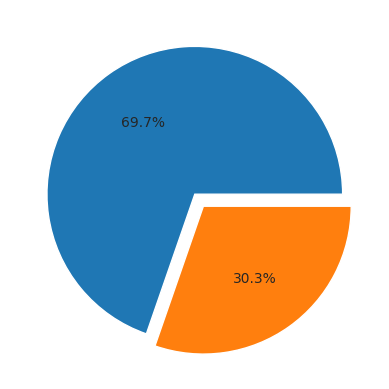

In [42]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

**Using plotly, how many of the restaurants do not accept online orders?**

In [43]:
!pip install plotly

In [44]:
import plotly.express as px

In [45]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [ ]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

In [47]:

# Calculate value counts and store in a new DataFrame
x = df['online_order'].value_counts().reset_index(name='count')

# Use the index of the DataFrame for names
fig = px.pie(x, values='count', names=x.index, title='Pie chart')  # Pass x.index instead of 'index'
fig.show()

**Using plotly, ratio b/w restaurants offering table booking vs. those that don't?**

In [48]:

import plotly.graph_objs as go
from plotly.offline import iplot

In [49]:

x=df['book_table'].value_counts()
labels=['reservations unavailable','reservations available']

In [50]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [51]:

iplot([trace])

**Types of restaurants available?**

In [52]:
df['rest_type'].isna().sum()


17

In [53]:
df['rest_type'].dropna(inplace=True)


In [54]:
df['rest_type'].isna().sum()


17

In [55]:
len(df['rest_type'].unique())


67

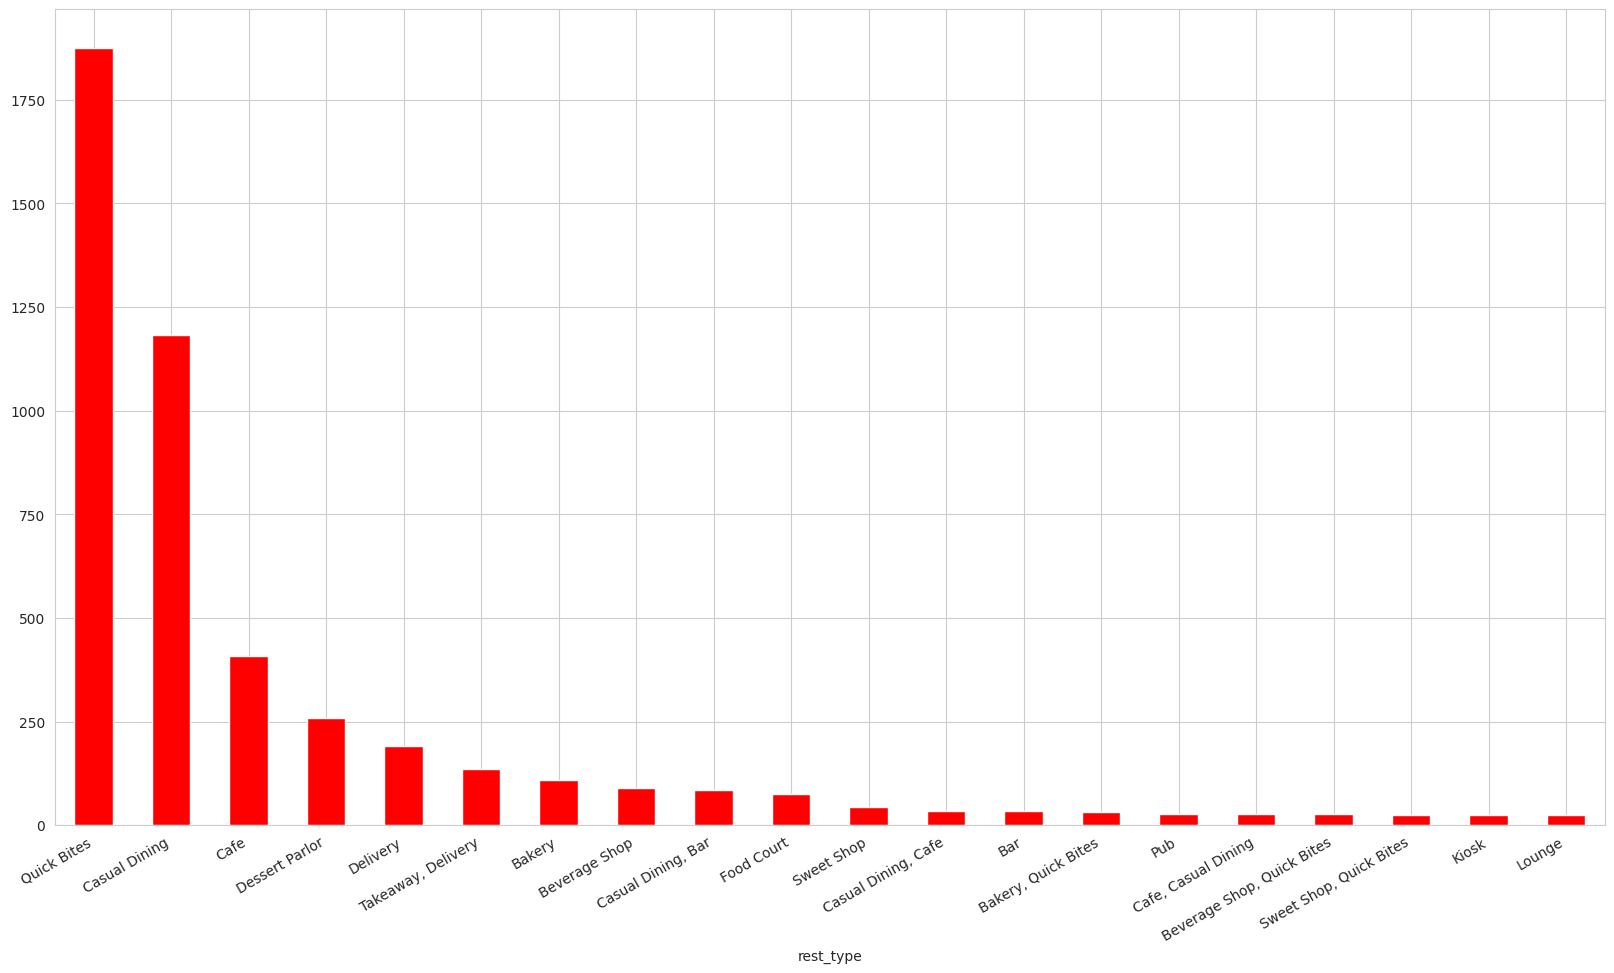

In [57]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()

**Using plotly, calculate the same**

In [58]:
trace1 = go.Bar(
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')

In [59]:
iplot([trace1])

**Observe how Quick Bites types of restaurants dominate**.


**The city of Bangalore is known as a high-tech hub of India, and people who live a busy and modern life are inclined to choose Quick Bites.**

**Restaurant with the highest rating**

<Axes: xlabel='name'>

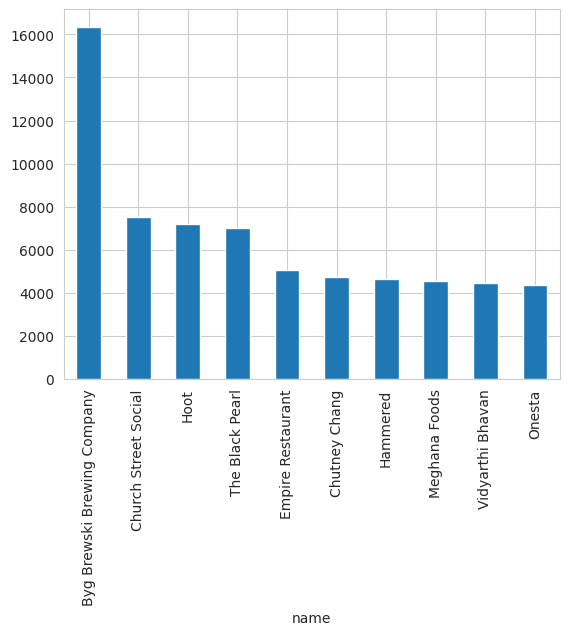

In [60]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar()

**Using plotly to create interactive graphs**

In [61]:
trace1 = go.Bar(
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= 'name')

In [62]:

iplot([trace1])

**List of all the restaurants in Bangalore at various locations**

In [63]:
df.groupby('location')['name'].unique()

location
BTM                      [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari             [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Bannerghatta Road        [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi             [Grand Village, Timepass Dinner, Srinathji's C...
Bellandur                [Kava - Fairfield by Marriott, MoMo Cafe - Cou...
Bommanahalli             [Pizza Palace, Calvin's, Sai Jagannath Food an...
Brigade Road             [Kitchen On Table, Panchavati Gaurav Thali, Sa...
CV Raman Nagar                                                [Polar Bear]
Central Bangalore                                            [Hit and Run]
Church Street            [Oh! Calcutta, Mainland China, Empire Restaura...
City Market              [Veganbreak24x7, Mayuri, Falafal, Al-Madina Re...
Commercial Street        [The Chocolate Heaven, Norsha Caffe, Utse Kitc...
Cunningham Road          [Skylit - Citrus Hotels, Banjara Melting Pot, ...
Domlur                   [Kerala Pavilion, Warm Oven, Potful, Indiana B...
East Bangalore                                  [Costa Biryanis, La-Pizza]
Ejipura                  [Punjabi Dhaba, McLeans Italian Pizzeria, Chun...
Electronic City                                              [Zatar House]
Frazer Town              [Healthy Sapiens, Pathaan Sir, Empire Restaura...
HSR                      [Navya Foods, The Paratha Company, New Punjabi...
Indiranagar              [Crunch Pizzas - Express Delivery, Donne Biriy...
Infantry Road            [The Oriental Spice - Ashraya Hotel, Mint Masa...
JP Nagar                 [Re Malnad Nati Style Hotel, Grow Fit, Barbequ...
Jayanagar                [Empire Restaurant, Biryanis And More, Namma B...
Jeevan Bhima Nagar                                           [Roti Shotti]
Kammanahalli                                             [Gelato Italiano]
Kanakapura Road          [Nammura Donne Biriyani, Shree Udupi Grand, Mo...
Koramangala 1st Block    [The Paratha Stories, B.M.W - Bhookh Mitaane W...
Koramangala 5th Block    [eat.fit, Shanmukha, Karavali Grand, Ascharya ...
Koramangala 6th Block    [The Charcoal Factory, The Food Dude, Friends ...
Koramangala 7th Block                   [Bhandary's Kitchen, Hungry Birds]
Koramangala 8th Block    [Sri Ganesh Juice Junction, Taste of Nepal, Sw...
Kumaraswamy Layout       [Kitchen Garden, Recipe, Tasty Bytes, Goa 0 Km...
Langford Town                                     [ThrowBack - Pub & Dine]
Lavelle Road             [JW Kitchen - JW Marriott Bengaluru, Rasovara,...
MG Road                  [Ebony, The Tao Terraces, Rim Naam - The Obero...
Majestic                 [New Prashanth Hotel, Halli Mane, Cake of the ...
Marathahalli             [PK Dhaba, The Black Pearl, Jalsa Gold, Barbec...
Mysore Road              [Rosewood International Hotel - Bar & Restaura...
Old Airport Road         [Kya Khaoge, Le Gateau - The Cake Shop, Shanmu...
Old Madras Road          [M.M.A Kababs Rolls & Biryani Center, Deshi Fu...
Race Course Road         [One Atria Cafe, Tea and Wine Lounge, Richie R...
Rajarajeshwari Nagar                         [Beijing Bites, Firangi Bake]
Residency Road           [Konark Vegetarian Restaurant, The Market - Th...
Richmond Road            [Marzipan @ The Bohemian House, Kudla - Hotel ...
Sarjapur Road            [Owl's Kitchen, The Fisherman's Wharf, AB's - ...
Seshadripuram                                              [Sangam Sweets]
Shanti Nagar             [Bread and Circus, Swati Cafe, Wazir's, Peace ...
Shivajinagar             [Tiger Trail - Ramada Hotel, CafÃÂÃÂÃÂÃ...
South Bangalore          [As On Fire, Belly Squad Food Truck, Bhaijaan ...
St. Marks Road           [Curry with a 'K' - St. Mark's Hotel, Truffles...
Ulsoor                   [Caraway Kitchen - Conrad Bengaluru, Barbeque ...
Uttarahalli              [Castle Rock, Potato House, Shree Mandarathi G...
Vasanth Nagar            [The Culinarium, Behrouz Biryani, Tadkawala, B...
Vijay Nagar     

In [64]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [65]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

restaurant
location                     
HSR                        83
Marathahalli               84
Basavanagudi              195
Sarjapur Road             197
BTM                       202
Banashankari              238
Jayanagar                 248
Bellandur                 277
JP Nagar                  300
Bannerghatta Road         357

<Axes: xlabel='location'>

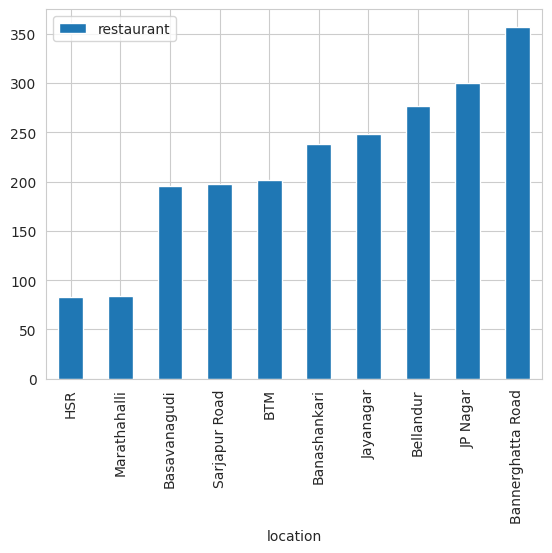

In [66]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()


In [67]:
df_total.sort_values(by='restaurant').tail(10).index


Index(['HSR', 'Marathahalli', 'Basavanagudi', 'Sarjapur Road', 'BTM',
       'Banashankari', 'Jayanagar', 'Bellandur', 'JP Nagar',
       'Bannerghatta Road'],
      dtype='object', name='location')

In [68]:
trace1 = go.Bar(
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')

In [69]:
iplot([trace1])


In [70]:
df.isnull().sum()


url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
phone                            79
location                          0
rest_type                        17
dish_liked                     2533
cuisines                          1
approx_cost(for two people)       8
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

**Different types of restaurants**

In [71]:
#data is represented in the form of percentage
(df['rest_type'].value_counts()/len(df))*100


rest_type
Quick Bites                   37.291169
Casual Dining                 23.528242
Cafe                           8.094670
Dessert Parlor                 5.151154
Delivery                       3.798727
                                ...    
Casual Dining, Irani Cafee     0.019889
Fine Dining, Lounge            0.019889
Bar, Quick Bites               0.019889
Confectionery                  0.019889
Pub, Microbrewery              0.019889
Name: count, Length: 66, dtype: float64

**Restaurant variety, e.g., south indian, north indian, etc.**

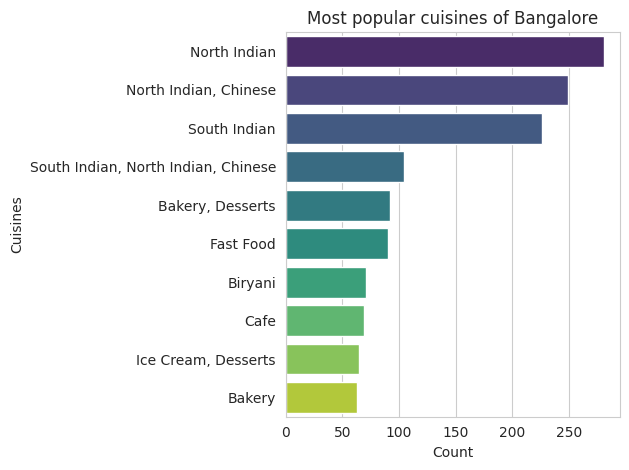

In [72]:
cuisines = df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines.values, y=cuisines.index, orient='h', palette='viridis')  # Add palette for colors
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.title("Most popular cuisines of Bangalore")
plt.tight_layout()
plt.show()

In [73]:
cuisines=df['cuisines'].value_counts()[:10]
trace1 = go.Bar(
        x = cuisines.index,
        y = cuisines,
        name= 'Cuisines')

In [74]:
iplot([trace1])

**The most common cuisines are North Indian, Chinese, South Indian, and Biriyani**

**Hence, the city of Bangalore is more influenced by the cultures of the North than those of the South.**

**Analyse approx. cost for 2 people**

In [75]:
len(df['approx_cost(for two people)'].value_counts())

46

In [76]:
df['approx_cost(for two people)'].isna().sum()

8

In [77]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)


In [78]:
df['approx_cost(for two people)'].isna().sum()


0

In [79]:
df['approx_cost(for two people)'].unique()


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250'], dtype=object)

In [80]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [81]:

df[~df['approx_cost(for two people)'].apply(is_float)]

url  \
67    https://www.zomato.com/gustoesbeerhouse?contex...   
119   https://www.zomato.com/bangalore/k27-the-pub-b...   
166   https://www.zomato.com/bangalore/patio-805-jay...   
207   https://www.zomato.com/bangalore/chutney-chang...   
217   https://www.zomato.com/bangalore/toscano-jayan...   
...                                                 ...   
5790  https://www.zomato.com/bangalore/cafe-mangii-l...   
5817  https://www.zomato.com/bangalore/alchemy-the-c...   
5818  https://www.zomato.com/bangalore/the-white-roo...   
5821  https://www.zomato.com/bangalore/fabelle-choco...   
5822  https://www.zomato.com/bangalore/bengaluru-bak...   

                                                address  \
67    10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...   
119   27, 27th Cross, 2nd Stage, Banashankari, Banga...   
166   805, Ground Floor, 35C Cross, 9th Main, 4th Bl...   
207   Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...   
217   359/38,Next to Fabindia, 7th Cross, 1st Block,...   
...                                                 ...   
5790  204/A, Comet Block, UB City, Vittal Mallya Roa...   
5817  The Chancery Pavilion, 135, Residency Road, Ba...   
5818     33, High Gates Hotel, Church Street, Bangalore   
5821  ITC Gardenia, 1, Ashok Nagar, Residency Road, ...   
5822  JW Marriott Bengaluru, 24/1, Vittal Mallya Roa...   

                                                  name online_order  \
67                                  Gustoes Beer House           No   
119                                      K27 - The Pub           No   
166                                          Patio 805          Yes   
207                                      Chutney Chang          Yes   
217                                            Toscano          Yes   
...                                                ...          ...   
5790                                       Cafe Mangii          Yes   
5817                   Alchemy - The Chancery Pavilion           No   
5818                 The White Room - Coffee & Kitchen           No   
5821         Fabelle Chocolate Boutique - ITC Gardenia           No   
5822  Bengaluru Baking Company - JW Marriott Bengaluru           No   

     book_table  rate  votes                           phone        location  \
67           No   4.1    868                    080 49653521    Banashankari   
119          No   3.1     30                  +91 9980097472    Banashankari   
166         Yes   4.1    364                  +91 8884999805       Jayanagar   
207         Yes   4.1   2339  080 22443007\r\n+91 9901967373       Jayanagar   
217         Yes   4.3   1129  080 41558423\r\n+91 7619320074       Jayanagar   
...         ...   ...    ...                             ...             ...   
5790        Yes   4.3   1048                  +91 8022270098    Lavelle Road   
5817        Yes   4.3    446                    080 45128699  Residency Road   
5818        Yes   4.0   1703  080 40222999\r\n+91 7406195000   Church Street   
5821         No   4.5    232                    080 66825270   Richmond Road   
5822         No   4.3    521  +91 9900244769\r\n080 67188511    Lavelle Road   

                        rest_type  \
67                            Pub   
119                           Bar   
166                 Casual Dining   
207                 Casual Dining   
217                 Casual Dining   
...                           ...   
5790                Casual Dining   
5817  Microbrewery, Casual Dining   
5818                         Cafe   
5821               Dessert Parlor   
5822                 Bakery, Cafe   

                                             dish_liked  \
67    Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...   
119                                                 NaN   
166   Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...   
207   Veg Momos, Brownie Chocolate, Palak Chaat, Mut...   
217   Pizza, Pasta, Salads, Calamari, Ravioli, Pumpk...   
...                  

In [82]:
df['approx_cost(for two people)'].dtype


dtype('O')

In [83]:
df['approx_cost(for two people)']


0         800
1         800
2         800
3         300
4         600
        ...  
5822    1,400
5823      300
5824      800
5825      150
5826      700
Name: approx_cost(for two people), Length: 5020, dtype: object

In [84]:
type(df['approx_cost(for two people)'][0])


str

In [85]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))


In [86]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)


**Cost vs Rating**

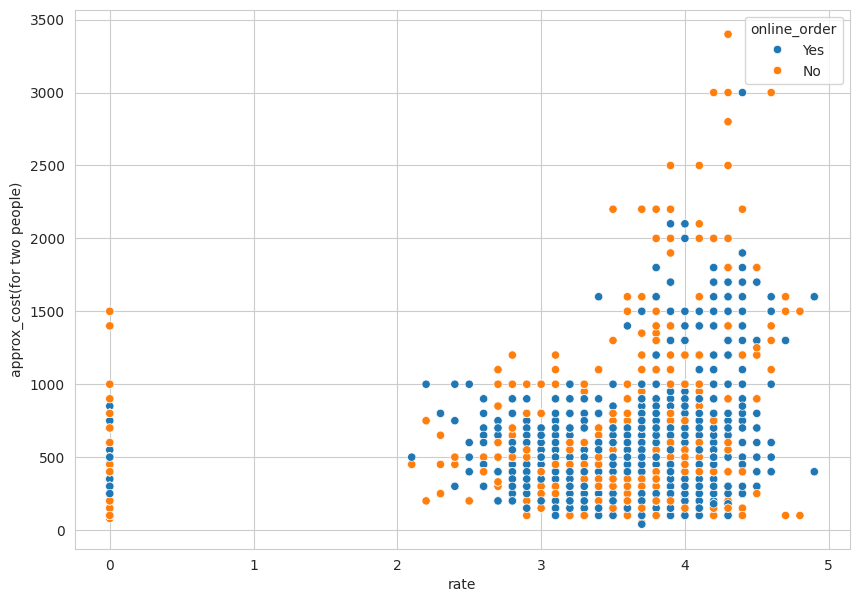

In [87]:

plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

**Having reviewed this scatterplot, we can conclude that most of the highest-rated restaurants accept online orders and are budget-friendly as well**

In [88]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

**How does the vote on restaurants accepting online orders compare to those refusing to accept them?**

<Axes: xlabel='online_order', ylabel='votes'>

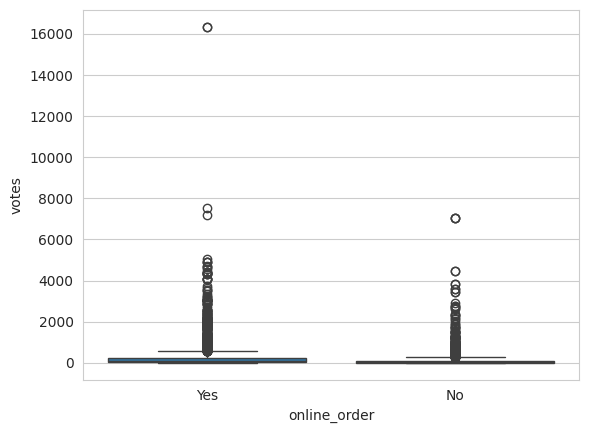

In [89]:
sns.boxplot(x='online_order',y='votes',data=df)


**In this box plot, it can be seen that there is a discrepancy between the median number of votes for both categories.**

**The Zomato application gives customers the option to rate restaurants after they've ordered through it. This will lead to more votes for the restaurants accepting online orders.**

**How does the price differ between restaurants that accept online orders and those that don't?**

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

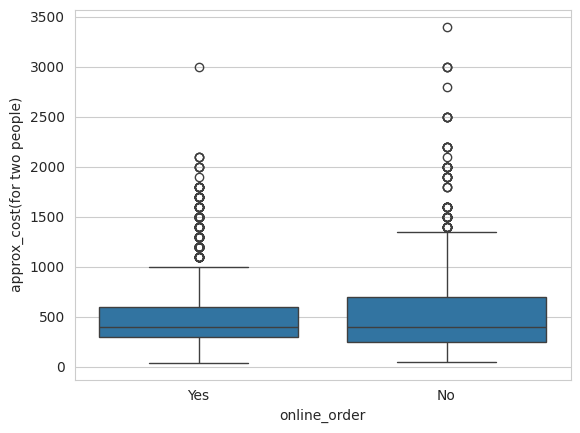

In [90]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)


In [91]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)')
fig.show()

**In comparison to restaurants that don't accept online orders, online ordering restaurants are less expensive.**

**Cheapest Rate for 2 people**

In [92]:
df['approx_cost(for two people)'].min()


40

**Most costly for 2 people**

In [93]:
df['approx_cost(for two people)'].max()


3400

In [94]:
df[df['approx_cost(for two people)']==6000]

Empty DataFrame
Columns: [url, address, name, online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item, listed_in(type), listed_in(city)]
Index: []

In [95]:
df[df['approx_cost(for two people)']==6000]['name']


Series([], Name: name, dtype: object)

**Distribution of cost for 2 people**

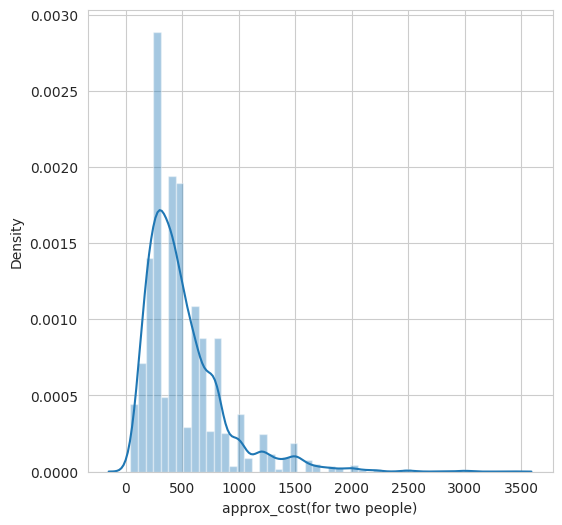

In [96]:
plt.figure(figsize=(6,6))
sns.distplot(df['approx_cost(for two people)'])
plt.show()

In [97]:
px.histogram(df, x="approx_cost(for two people)")


**The majority of these restaurants are priced under 1000, which means they are affordable and few are luxurious.**

**In what restaurant does the most costly rate for two people exist? What is the dish involved? The most popular dish to eat there?**

In [98]:
df[df['approx_cost(for two people)']==6000].loc[:,('name','cuisines','dish_liked')]


Empty DataFrame
Columns: [name, cuisines, dish_liked]
Index: []

In [99]:
df[df['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]


Empty DataFrame
Columns: [name, cuisines, dish_liked]
Index: []

In [100]:
data=df.copy()

In [101]:
data.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [102]:
data.set_index('name',inplace=True)


**Top ten most expensive restaurants, based on an estimate for two people**

<Axes: xlabel='name'>

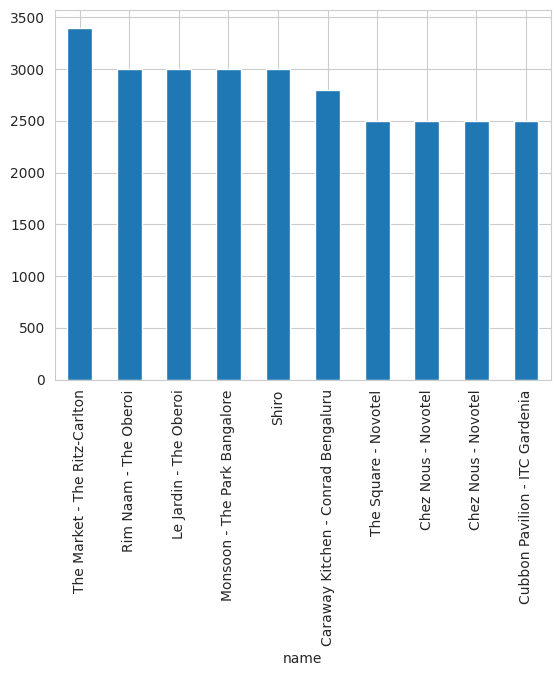

In [103]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()


In [104]:

trace1 = go.Bar(
        x = data['approx_cost(for two people)'].nlargest(10).index,
        y = data['approx_cost(for two people)'].nlargest(10),
        name= 'Priority')
iplot([trace1])

**Top ten most expensive restaurants, based on an estimate for two people**

<Axes: xlabel='name'>

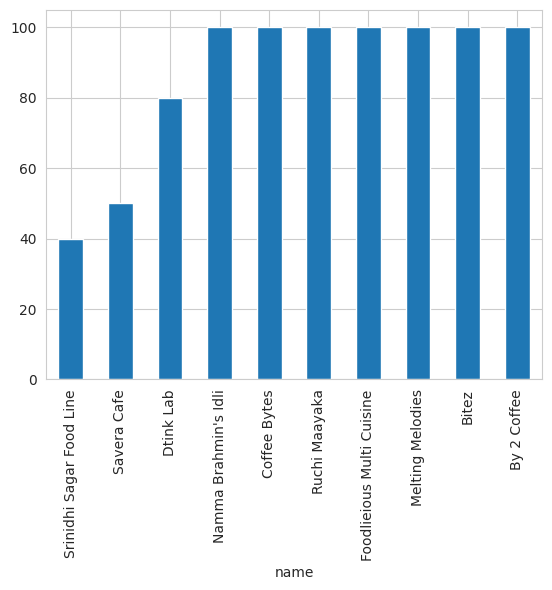

In [105]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()


In [106]:
trace1 = go.Bar(
        x = data['approx_cost(for two people)'].nsmallest(10).index,
        y = data['approx_cost(for two people)'].nsmallest(10),
        name= 'Priority')
iplot([trace1])

**Top ten most cheapest restaurants, based on an estimate for two people**

In [107]:
# Check if 'location' is a column in your dataframe
print(data.columns)

# If 'location' is not a column, add it to your dataframe
if 'location' not in data.columns:
    data['location'] = location  # Assuming 'location' is the list containing location data

# Now you can set 'location' as index
data.set_index('location', inplace=True)

# Get the 10 smallest values in 'approx_cost(for two people)'
smallest_costs = data['approx_cost(for two people)'].nsmallest(10)
print(smallest_costs)

Index(['url', 'address', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')
location
Indiranagar      40
Shivajinagar     50
Banashankari     80
Jayanagar       100
Banashankari    100
Banashankari    100
Banashankari    100
Banashankari    100
Banashankari    100
Basavanagudi    100
Name: approx_cost(for two people), dtype: int64


**Restaurants under 500 (budget hotels)**

In [108]:
data[data['approx_cost(for two people)']<=500]


url  \
location                                                               
Banashankari       https://www.zomato.com/bangalore/addhuri-udupi...   
Banashankari       https://www.zomato.com/bangalore/caf%C3%A9-dow...   
Banashankari       https://www.zomato.com/bangalore/the-coffee-sh...   
Banashankari       https://www.zomato.com/bangalore/caf-eleven-ba...   
Banashankari       https://www.zomato.com/bangalore/t3h-cafe-bana...   
...                                                              ...   
Brigade Road       https://www.zomato.com/bangalore/snow-gola-bri...   
Brigade Road       https://www.zomato.com/bangalore/ibaco-brigade...   
Residency Road     https://www.zomato.com/bangalore/art-of-deligh...   
Commercial Street  https://www.zomato.com/bangalore/bhagatram-swe...   
Church Street      https://www.zomato.com/bangalore/99-pancakes-2...   

                                                             address  \
location                                                               
Banashankari       1st Floor, Annakuteera, 3rd Stage, Banashankar...   
Banashankari       12,29 Near PES University Back Gate, D'Souza N...   
Banashankari           6th Block, 3rd Stage, Banashankari, Bangalore   
Banashankari       111, Sapphire Toys Building, 100 Feet Ring Roa...   
Banashankari       504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
...                                                              ...   
Brigade Road                5th Avenue Mall, Brigade Road, Bangalore   
Brigade Road       121, Civil Station, Wood Street Junction, Brig...   
Residency Road                       44/1, Residency Road, Bangalore   
Commercial Street  174/1-14, Near Bata Showroom, Commercial Stree...   
Church Street      16/3, Phoenix Arcade, Ground Floor, Shanthala ...   

                  online_order book_table  rate  votes  \
location                                                 
Banashankari                No         No   3.7     88   
Banashankari               Yes         No   4.1    402   
Banashankari               Yes        Yes   4.2    164   
Banashankari                No         No   4.0    424   
Banashankari                No         No   3.9     93   
...                        ...        ...   ...    ...   
Brigade Road                No         No   3.7     17   
Brigade Road               Yes         No   4.0     93   
Residency Road              No         No   4.4   1896   
Commercial Street           No         No   3.6    221   
Church Street              Yes         No   4.1     41   

                                              phone       rest_type  \
location                                                              
Banashankari                         +91 9620009302     Quick Bites   
Banashankari         080 26724489\r\n+91 7406048982            Cafe   
Banashankari                         +91 9731644212            Cafe   
Banashankari                           080 49577715            Cafe   
Banashankari                         +91 8884726600            Cafe   
...                                             ...             ...   
Brigade Road       +91 9845997744\r\n+91 9742358113  Dessert Parlor   
Brigade Road       +91 8147956774\r\n+91 8970428418  Dessert Parlor   
Residency Road                         080 40913229  Dessert Parlor   
Commercial Street  +91 9980116903\r\n+91 9611184643     Quick Bites   
Church Street                        +91 7483655827  Dessert Parlor   

                                                          dish_liked  \
location                                                               
Banashankari                                             Masala Dosa   
Banashankari       Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
Banashankari       Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
Banashankari       Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...   
Banashankari          Cheese Maggi, Peri Peri Fries, Pasta Arrabiata   
...     

In [109]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head()

location  approx_cost(for two people)
0  Banashankari                          300
1  Banashankari                          500
2  Banashankari                          500
3  Banashankari                          450
4  Banashankari                          300

<Axes: xlabel='approx_cost(for two people)'>

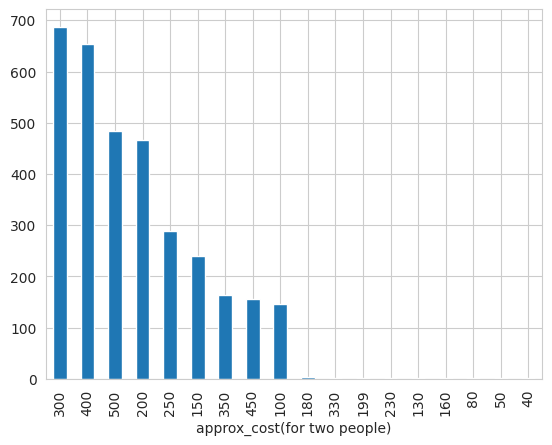

In [111]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()

**It is reasonable to conclude that dishes worth 300 and 400 are the maximum in number**

In [112]:
trace1 = go.Bar(
        x = df_budget['approx_cost(for two people)'].value_counts().index,
        y = df_budget['approx_cost(for two people)'].value_counts(),
        name= 'Priority')
iplot([trace1])

**Budget-friendly restaurants with rating >4**

In [113]:
df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)].shape


(462, 17)

**Overall number of restaurants that have ratings >4 and are under budget (less than 500)**

In [114]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

239

**Affordable hotels available in various locations**

In [115]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [116]:
len(location)


32

In [117]:
len(total)

32

In [118]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)

In [119]:
location_df.head(20)

restaurant
location                         
BTM                            21
Banashankari                   24
Bannerghatta Road              18
Basavanagudi                   30
Bellandur                      18
Brigade Road                    9
Church Street                   5
Commercial Street               1
Cunningham Road                 3
Domlur                          1
Ejipura                         1
Electronic City                 1
Frazer Town                     4
HSR                            11
Indiranagar                    11
JP Nagar                       24
Jayanagar                      48
Koramangala 5th Block           1
Koramangala 6th Block           1
Koramangala 8th Block           2

In [120]:

type(location)

list

Text(0, 0.5, 'Total restaurants')

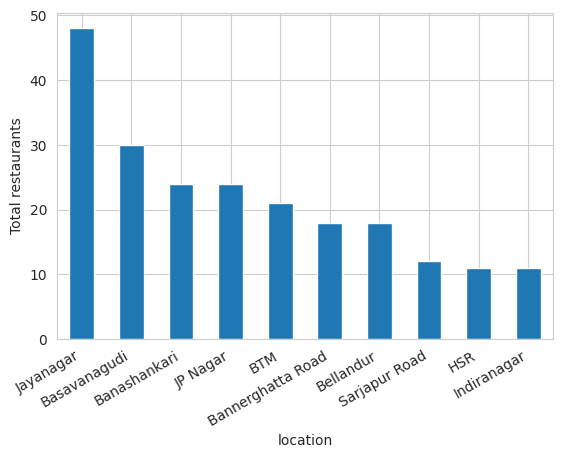

In [121]:
location_df['restaurant'].nlargest(10).plot.bar()
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

In [122]:
trace1 = go.Bar(
        x = location_df['restaurant'].nlargest(10).index,
        y = location_df['restaurant'].nlargest(10),
        name= 'Priority')
iplot([trace1])


**To visualize the names of the hotels**

In [123]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(location_df['name'].unique())

In [124]:
afford=pd.DataFrame(zip(location,total))
afford.columns=['location','res_names']
afford.set_index('location',inplace=True)
afford.head()


res_names
location                                                            
BTM                [eat.fit, Hiyar Majhe Kolkata, XO Belgian Waff...
Banashankari       [CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...
Bannerghatta Road  [BOX8- Desi Meals, Krishna Kuteera, Krishna Ku...
Basavanagudi       [Kabab Magic, Sri Guru Kottureshwara Davangere...
Bellandur          [The Salad Studio, Cafe Jezve, eat.fit, BOX8- ...

**Finding budget-friendly restaurants in a location**

#Pass location and restaurant type as parameteres, function will return name of restaurants.


In [126]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) &
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [127]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes'], dtype=object)

**Foodie's hotspots**

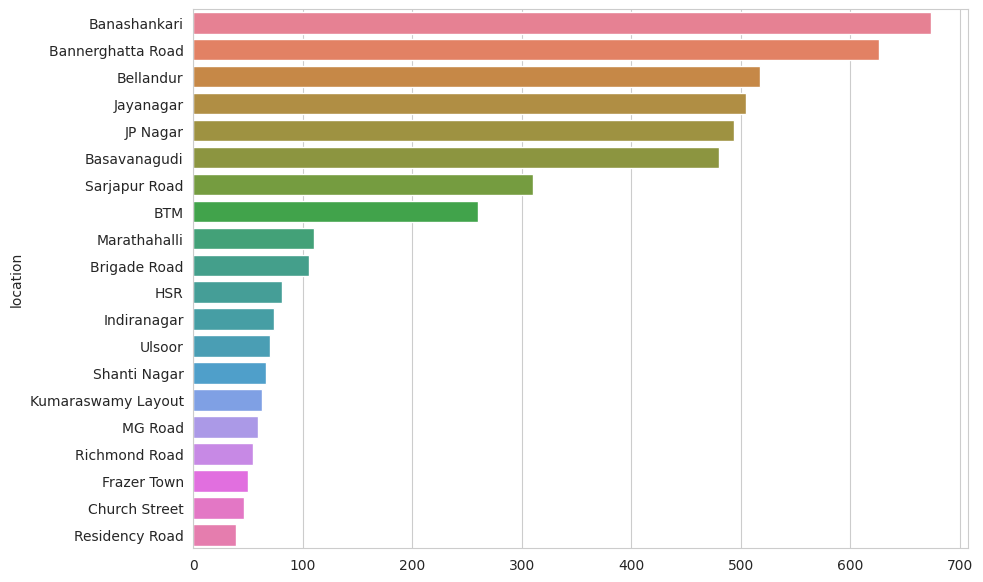

In [141]:
plt.figure(figsize=(10,7))
Restaurant_locations = df['location'].value_counts()[:20]
sns.barplot(y=Restaurant_locations.index, x=Restaurant_locations.values,  palette="husl") # Use keyword arguments to specify x and y
plt.show()

In [143]:
Restaurant_locations=df['location'].value_counts()[:20]
trace1 = go.Bar(
        y = Restaurant_locations.index,
        x = Restaurant_locations,
        orientation = 'h',
        name= 'Priority')
iplot([trace1])


The most no. of eateries are found in BTM, HSR, and Koranmangala 5th block.
BTM dominates the section by having more than 4000 restaurants.

**Geographical Analysis**

For geographical data analysis, latitudes and longitudes are required for each location.

To obtain latitudes and longitudes for each location, use geopy.

In [144]:
df.shape

(5020, 17)

In [145]:
len(df['location'].unique())

56

In [146]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [147]:
locations['new_Name']='Bangalore '+locations['Name']


In [149]:
locations.head()


Name                      new_Name
0        Banashankari        Bangalore Banashankari
1        Basavanagudi        Bangalore Basavanagudi
2         Mysore Road         Bangalore Mysore Road
3           Jayanagar           Bangalore Jayanagar
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout

In [150]:
!pip install geopy

In [151]:

from geopy.geocoders import Nominatim

In [154]:
import numpy as np
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

lat_lon=[]
geolocator=Nominatim(user_agent="app")  # Keep your user agent
for location in locations['Name']:
    try:
        location_data = geolocator.geocode(location, timeout=10)  # Increased timeout to 10 seconds
        if location_data is None:
            lat_lon.append(np.nan)
        else:
            geo=(location_data.latitude,location_data.longitude)
            lat_lon.append(geo)
    except GeocoderTimedOut:
        print(f"Timeout for location: {location}")
        lat_lon.append(np.nan)  # Append NaN for timed-out locations

In [155]:
locations['geo_loc']=lat_lon

In [156]:
locations.head()

Name                      new_Name                   geo_loc
0        Banashankari        Bangalore Banashankari  (15.8876779, 75.7046777)
1        Basavanagudi        Bangalore Basavanagudi  (13.8345913, 75.7339359)
2         Mysore Road         Bangalore Mysore Road  (12.9466619, 77.5300896)
3           Jayanagar           Bangalore Jayanagar  (27.3493013, 95.3159407)
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout  (12.9067683, 77.5595021)

In [157]:
locations.to_csv('zomato_locations.csv',index=False)

In [158]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())


In [159]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

Name  count
0       Banashankari    674
1  Bannerghatta Road    626
2          Bellandur    517
3          Jayanagar    505
4           JP Nagar    494

In [160]:
locations.head()


Name                      new_Name                   geo_loc
0        Banashankari        Bangalore Banashankari  (15.8876779, 75.7046777)
1        Basavanagudi        Bangalore Basavanagudi  (13.8345913, 75.7339359)
2         Mysore Road         Bangalore Mysore Road  (12.9466619, 77.5300896)
3           Jayanagar           Bangalore Jayanagar  (27.3493013, 95.3159407)
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout  (12.9067683, 77.5595021)

In [161]:
locations.shape


(56, 3)

In [162]:
Rest_locations.shape


(56, 2)

In [163]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna() #combine both dataframes
Restaurant_locations.head()

Name  count                     new_Name  \
0       Banashankari    674       Bangalore Banashankari   
1  Bannerghatta Road    626  Bangalore Bannerghatta Road   
2          Bellandur    517          Bangalore Bellandur   
3          Jayanagar    505          Bangalore Jayanagar   
4           JP Nagar    494           Bangalore JP Nagar   

                     geo_loc  
0   (15.8876779, 75.7046777)  
1   (12.9075495, 77.6004113)  
2  (12.93103185, 77.6782471)  
3   (27.3493013, 95.3159407)  
4   (12.2655944, 76.6465404)

In [164]:
Restaurant_locations.shape


(56, 4)

In [165]:
Restaurant_locations['count'].max()


674

In [166]:
type(Restaurant_locations['geo_loc'][0])


tuple

In [167]:

def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [168]:
len(Restaurant_locations['geo_loc'])

56

In [169]:
Restaurant_locations.isna().sum()


Name        0
count       0
new_Name    0
geo_loc     0
dtype: int64

In [170]:
Restaurant_locations['geo_loc'][0][0]


15.8876779

In [171]:
Restaurant_locations['geo_loc'][0][1]


75.7046777

In [172]:
np.array(Restaurant_locations['geo_loc'])


array([(15.8876779, 75.7046777), (12.9075495, 77.6004113),
       (12.93103185, 77.6782471), (27.3493013, 95.3159407),
       (12.2655944, 76.6465404), (13.8345913, 75.7339359),
       (12.9243866, 77.6508897), (45.95485055, -112.49659530324134),
       (12.9552572, 77.6984163), (-36.9749456, 174.7825752),
       (29.1523467, 75.7245798), (19.9166895, 77.5952124),
       (12.9778793, 77.6246697), (12.983117, 80.0578688),
       (12.9067683, 77.5595021), (12.9755264, 77.6067902),
       (40.5806845, -74.1132053), (12.9986827, 77.615525),
       (40.7110956, -74.0108317), (38.7385916, -77.5275749),
       (12.9817058, 77.5987234), (38.5041109, -122.7586448),
       (12.9489339, 77.5968273), (-33.9144851, 151.2465126),
       (39.76880625, -86.15345077251979), (17.4938648, 78.3862078),
       (12.98815675, 77.62260003796), (51.5157652, -0.0722499),
       (12.9466619, 77.5300896), (18.532248199999998, 73.84990967997429),
       (30.3141045, -89.8035331), (12.9624669, 77.6381958),
       (

In [173]:
#unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [174]:
type(lat)


tuple

In [175]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [176]:
Restaurant_locations.head()


Name  count                     new_Name  \
0       Banashankari    674       Bangalore Banashankari   
1  Bannerghatta Road    626  Bangalore Bannerghatta Road   
2          Bellandur    517          Bangalore Bellandur   
3          Jayanagar    505          Bangalore Jayanagar   
4           JP Nagar    494           Bangalore JP Nagar   

                     geo_loc        lat        lon  
0   (15.8876779, 75.7046777)  15.887678  75.704678  
1   (12.9075495, 77.6004113)  12.907550  77.600411  
2  (12.93103185, 77.6782471)  12.931032  77.678247  
3   (27.3493013, 95.3159407)  27.349301  95.315941  
4   (12.2655944, 76.6465404)  12.265594  76.646540

In [177]:
!pip install folium


In [178]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [179]:
basemap


In [180]:
Restaurant_locations[['lat','lon','count']].values.tolist()


[[15.8876779, 75.7046777, 674.0],
 [12.9075495, 77.6004113, 626.0],
 [12.93103185, 77.6782471, 517.0],
 [27.3493013, 95.3159407, 505.0],
 [12.2655944, 76.6465404, 494.0],
 [13.8345913, 75.7339359, 480.0],
 [12.9243866, 77.6508897, 310.0],
 [45.95485055, -112.49659530324134, 260.0],
 [12.9552572, 77.6984163, 110.0],
 [-36.9749456, 174.7825752, 106.0],
 [29.1523467, 75.7245798, 81.0],
 [19.9166895, 77.5952124, 74.0],
 [12.9778793, 77.6246697, 70.0],
 [12.983117, 80.0578688, 66.0],
 [12.9067683, 77.5595021, 63.0],
 [12.9755264, 77.6067902, 59.0],
 [40.5806845, -74.1132053, 54.0],
 [12.9986827, 77.615525, 50.0],
 [40.7110956, -74.0108317, 46.0],
 [38.7385916, -77.5275749, 39.0],
 [12.9817058, 77.5987234, 38.0],
 [38.5041109, -122.7586448, 37.0],
 [12.9489339, 77.5968273, 33.0],
 [-33.9144851, 151.2465126, 23.0],
 [39.76880625, -86.15345077251979, 21.0],
 [17.4938648, 78.3862078, 18.0],
 [12.98815675, 77.62260003796, 18.0],
 [51.5157652, -0.0722499, 17.0],
 [12.9466619, 77.5300896, 17.0],
 

In [181]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)


In [182]:
basemap


**It is evident that eateries are primarily located in the central Bangalore region.**

**As we get farther from the center of the city, the number of restaurants decreases.**

**Therefore, prospective restaurateurs can consult this to identify suitable places for their business.**

**Note: Heatmaps work best when we have the latitude, longitude, importance, or count of a particular location.**

**Heatmap of North Indian restaurants**

In [183]:
df.head()


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [184]:
df2= df[df['cuisines']=='North Indian']
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   0.0      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [185]:
north_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india.columns=['Name','count']
north_india.head()

Name  count
0                BTM     21
1       Banashankari     34
2  Bannerghatta Road     27
3       Basavanagudi     12
4          Bellandur     57

In [186]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()


In [187]:
north_india.head()


Name  count                     new_Name  \
0                BTM     21                Bangalore BTM   
1       Banashankari     34       Bangalore Banashankari   
2  Bannerghatta Road     27  Bangalore Bannerghatta Road   
3       Basavanagudi     12       Bangalore Basavanagudi   
4          Bellandur     57          Bangalore Bellandur   

                              geo_loc  
0  (45.95485055, -112.49659530324134)  
1            (15.8876779, 75.7046777)  
2            (12.9075495, 77.6004113)  
3            (13.8345913, 75.7339359)  
4           (12.93103185, 77.6782471)

In [188]:
north_india['lan'],north_india['lon']=zip(*north_india['geo_loc'].values)


In [189]:
north_india.drop(['geo_loc'],axis=1)


Name  count                         new_Name        lan  \
0                     BTM     21                    Bangalore BTM  45.954851   
1            Banashankari     34           Bangalore Banashankari  15.887678   
2       Bannerghatta Road     27      Bangalore Bannerghatta Road  12.907550   
3            Basavanagudi     12           Bangalore Basavanagudi  13.834591   
4               Bellandur     57              Bangalore Bellandur  12.931032   
5            Brigade Road      4           Bangalore Brigade Road -36.974946   
6           Church Street      2          Bangalore Church Street  40.711096   
7       Commercial Street      1      Bangalore Commercial Street  51.515765   
8             Frazer Town      3            Bangalore Frazer Town  12.998683   
9                     HSR      8                    Bangalore HSR  29.152347   
10            Indiranagar      2            Bangalore Indiranagar  19.916690   
11               JP Nagar     32               Bangalore JP Nagar  12.265594   
12              Jayanagar     10              Bangalore Jayanagar  27.349301   
13     Jeevan Bhima Nagar      1     Bangalore Jeevan Bhima Nagar  12.967807   
14  Koramangala 1st Block      1  Bangalore Koramangala 1st Block  12.927725   
15  Koramangala 7th Block      2  Bangalore Koramangala 7th Block  12.936485   
16     Kumaraswamy Layout      9     Bangalore Kumaraswamy Layout  12.906768   
17                MG Road      2                Bangalore MG Road  12.975526   
18           Marathahalli      7           Bangalore Marathahalli  12.955257   
19         Residency Road      1         Bangalore Residency Road  38.738592   
20          Richmond Road      3          Bangalore Richmond Road  40.580684   
21          Sarjapur Road     18          Bangalore Sarjapur Road  12.924387   
22           Shanti Nagar      9           Bangalore Shanti Nagar  12.983117   
23                 Ulsoor      3                 Bangalore Ulsoor  12.977879   
24          Vasanth Nagar      1          Bangalore Vasanth Nagar  17.493865   
25             Whitefield      1             Bangalore Whitefield  53.553368   
26          Wilson Garden      7          Bangalore Wilson Garden  12.948934   

           lon  
0  -112.496595  
1    75.704678  
2    77.600411  
3    75.733936  
4    77.678247  
5   174.782575  
6   -74.010832  
7    -0.072250  
8    77.615525  
9    75.724580  
10   77.595212  
11   76.646540  
12   95.315941  
13   77.656837  
14   77.632782  
15   77.613478  
16   77.559502  
17   77.606790  
18   77.698416  
19  -77.527575  
20  -74.113205  
21   77.650890  
22   80.057869  
23   77.624670  
24   78.386208  
25   -2.296902  
26   77.596827

In [190]:
basemap=generateBaseMap()
HeatMap(north_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

**Heatmap of South Indian restaurants**

In [191]:
df3= df[df['cuisines']=='South Indian']
south_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
south_india.columns=['Name','count']
south_india=south_india.merge(locations,on="Name",how='left').dropna()
south_india['lan'],south_india['lon']=zip(*south_india['geo_loc'].values)

In [192]:
south_india=south_india.drop(['geo_loc'],axis=1)

In [193]:
south_india.head()


Name  count                     new_Name        lan  \
0                BTM     21                Bangalore BTM  45.954851   
1       Banashankari     34       Bangalore Banashankari  15.887678   
2  Bannerghatta Road     27  Bangalore Bannerghatta Road  12.907550   
3       Basavanagudi     12       Bangalore Basavanagudi  13.834591   
4          Bellandur     57          Bangalore Bellandur  12.931032   

          lon  
0 -112.496595  
1   75.704678  
2   77.600411  
3   75.733936  
4   77.678247

In [194]:
basemap=generateBaseMap()
HeatMap(south_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

**Chains with the most popularity for casual dining**

In [195]:
df_1=df.groupby(['rest_type','name']).agg('count')
datas=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

In [196]:
datas

level_0           rest_type  \
0          0              Bakery   
1          0              Bakery   
2          0              Bakery   
3          1        Bakery, Cafe   
4          1        Bakery, Cafe   
..       ...                 ...   
154       64            Takeaway   
155       64            Takeaway   
156       65  Takeaway, Delivery   
157       65  Takeaway, Delivery   
158       65  Takeaway, Delivery   

                                                 name  count  
0                                           Just Bake      9  
1                                      Cakes & Slices      4  
2                                          Sugar Rush      4  
3                                    Glen's Bakehouse      3  
4    Bengaluru Baking Company - JW Marriott Bengaluru      2  
..                                                ...    ...  
154             Balaji Bombay Vada Pav Gujrati Dalebi      1  
155                                     Hungry Haters      1  
156                                     The Good Bowl      5  
157                                  BOX8- Desi Meals      4  
158                          Mojo Pizza - 2X Toppings      3  

[159 rows x 4 columns]

In [197]:
df_1=df.groupby(['rest_type','name']).agg('count')
df_1

url  address  online_order  \
rest_type          name                                                
Bakery             All Saints Bakery        2        2             2   
                   Amande Patisserie        4        4             4   
                   Amma's Pastries          1        1             1   
                   Archana's First Crush    2        2             2   
                   Atty's Bakery            1        1             1   
...                                       ...      ...           ...   
Takeaway, Delivery Venkateshwara Foods      1        1             1   
                   WOW MOMO                 1        1             1   
                   Woodstok                 1        1             1   
                   Y Not Restaurant         1        1             1   
                   Yumme Veg                1        1             1   

                                          book_table  rate  votes  phone  \
rest_type          name                                                    
Bakery             All Saints Bakery               2     2      2      2   
                   Amande Patisserie               4     4      4      4   
                   Amma's Pastries                 1     1      1      1   
                   Archana's First Crush           2     2      2      2   
                   Atty's Bakery                   1     1      1      1   
...                                              ...   ...    ...    ...   
Takeaway, Delivery Venkateshwara Foods             1     1      1      1   
                   WOW MOMO                        1     1      1      1   
                   Woodstok                        1     1      1      1   
                   Y Not Restaurant                1     1      1      1   
                   Yumme Veg                       1     1      1      1   

                                          location  dish_liked  cuisines  \
rest_type          name                                                    
Bakery             All Saints Bakery             2           0         2   
                   Amande Patisserie             4           4         4   
                   Amma's Pastries               1           1         1   
                   Archana's First Crush         2           0         2   
                   Atty's Bakery                 1           1         1   
...                                            ...         ...       ...   
Takeaway, Delivery Venkateshwara Foods           1           0         1   
                   WOW MOMO                      1           0         1   
                   Woodstok                      1           1         1   
                   Y Not Restaurant              1           0         1   
                   Yumme Veg                     1           0         1   

                                          approx_cost(for two people)  \
rest_type          name                                                 
Bakery             All Saints Bakery                                2   
                   Amande Patisserie                                4   
                   Amma's Pastries                                  1   
                   Archana's First Crush                            2   
                   Atty's Bakery                                    1   
...                                                               ...   
Takeaway, Delivery Venkateshwara Foods                              1   
                   WOW MOMO                                         1   
                   Woodstok                                         1   
                   Y Not Restaurant                                 1   
                   Yumme Veg                                        1   

                                          reviews_list  menu_item  \
rest_type          name                                             
Bakery             All Saints Bakery   

In [198]:
df_1.sort_values(['url'],ascending=False)

url  address  online_order  \
rest_type           name                                              
Cafe                Cafe Coffee Day       16       16            16   
Quick Bites         Five Star Chicken     13       13            13   
Casual Dining       New Prashanth Hotel   12       12            12   
Casual Dining, Cafe Onesta                10       10            10   
Cafe, Casual Dining San Churro Cafe       10       10            10   
...                                      ...      ...           ...   
Dessert Parlor      Mist n Creams          1        1             1   
                    Minus 4                1        1             1   
                    Milano Ice Cream       1        1             1   
                    L'inoui                1        1             1   
Takeaway, Delivery  Yumme Veg              1        1             1   

                                         book_table  rate  votes  phone  \
rest_type           name                                                  
Cafe                Cafe Coffee Day              16    16     16     15   
Quick Bites         Five Star Chicken            13    13     13     13   
Casual Dining       New Prashanth Hotel          12    12     12     12   
Casual Dining, Cafe Onesta                       10    10     10     10   
Cafe, Casual Dining San Churro Cafe              10    10     10     10   
...                                             ...   ...    ...    ...   
Dessert Parlor      Mist n Creams                 1     1      1      1   
                    Minus 4                       1     1      1      1   
                    Milano Ice Cream              1     1      1      1   
                    L'inoui                       1     1      1      0   
Takeaway, Delivery  Yumme Veg                     1     1      1      1   

                                         location  dish_liked  cuisines  \
rest_type           name                                                  
Cafe                Cafe Coffee Day            16           3        16   
Quick Bites         Five Star Chicken          13           2        13   
Casual Dining       New Prashanth Hotel        12           8        12   
Casual Dining, Cafe Onesta                     10          10        10   
Cafe, Casual Dining San Churro Cafe            10          10        10   
...                                           ...         ...       ...   
Dessert Parlor      Mist n Creams               1           0         1   
                    Minus 4                     1           0         1   
                    Milano Ice Cream            1           1         1   
                    L'inoui                     1           0         1   
Takeaway, Delivery  Yumme Veg                   1           0         1   

                                         approx_cost(for two people)  \
rest_type           name                                               
Cafe                Cafe Coffee Day                               16   
Quick Bites         Five Star Chicken                             13   
Casual Dining       New Prashanth Hotel                           12   
Casual Dining, Cafe Onesta                                        10   
Cafe, Casual Dining San Churro Cafe                               10   
...                                                              ...   
Dessert Parlor      Mist n Creams                                  1   
                    Minus 4                                        1   
                    Milano Ice Cream                               1   
                    L'inoui                                        1   
Takeaway, Delivery  Yumme Veg                                      1   

                                         reviews_list  menu_item  \
rest_type           name                                           
Cafe                Cafe Coffee Day                16         16   
Quick Bites         Five

In [199]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))


url  address  online_order  \
   rest_type          name                                              
0  Bakery             Just Bake              9        9             9   
                      Cakes & Slices         4        4             4   
                      Sugar Rush             4        4             4   
                      Warm Oven              4        4             4   
                      The Big O Bakes        4        4             4   
...                                        ...      ...           ...   
65 Takeaway, Delivery Falafal                1        1             1   
                      Shanmukha              1        1             1   
                      Calvin's               1        1             1   
                      Chandrima's Kitchen    1        1             1   
                      Yumme Veg              1        1             1   

                                           book_table  rate  votes  phone  \
   rest_type          name                                                  
0  Bakery             Just Bake                     9     9      9      9   
                      Cakes & Slices                4     4      4      4   
                      Sugar Rush                    4     4      4      4   
                      Warm Oven                     4     4      4      4   
                      The Big O Bakes               4     4      4      4   
...                                               ...   ...    ...    ...   
65 Takeaway, Delivery Falafal                       1     1      1      1   
                      Shanmukha                     1     1      1      1   
                      Calvin's                      1     1      1      1   
                      Chandrima's Kitchen           1     1      1      1   
                      Yumme Veg                     1     1      1      1   

                                           location  dish_liked  cuisines  \
   rest_type          name                                                  
0  Bakery             Just Bake                   9           0         9   
                      Cakes & Slices              4           0         4   
                      Sugar Rush                  4           0         4   
                      Warm Oven                   4           1         4   
                      The Big O Bakes             4           0         4   
...                                             ...         ...       ...   
65 Takeaway, Delivery Falafal                     1           0         1   
                      Shanmukha                   1           0         1   
                      Calvin's                    1           0         1   
                      Chandrima's Kitchen         1           0         1   
                      Yumme Veg                   1           0         1   

                                           approx_cost(for two people)  \
   rest_type          name                                               
0  Bakery             Just Bake                                      9   
                      Cakes & Slices                                 4   
                      Sugar Rush                                     4   
                      Warm Oven                                      4   
                      The Big O Bakes                                4   
...                                                                ...   
65 Takeaway, Delivery Falafal                                        1   
                      Shanmukha                                      1   
                      Calvin's                                       1   
                      Chandrima's Kitchen                            1   
                      Yumme Veg                                      1   

                                           reviews_list  menu_item  \
   rest_type          name                              

In [200]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))['url']


rest_type           name               
0   Bakery              Just Bake              9
                        Cakes & Slices         4
                        Sugar Rush             4
                        Warm Oven              4
                        The Big O Bakes        4
                                              ..
65  Takeaway, Delivery  Falafal                1
                        Shanmukha              1
                        Calvin's               1
                        Chandrima's Kitchen    1
                        Yumme Veg              1
Name: url, Length: 2589, dtype: int64

In [201]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))['url'].reset_index()


level_0           rest_type                 name  url
0           0              Bakery            Just Bake    9
1           0              Bakery       Cakes & Slices    4
2           0              Bakery           Sugar Rush    4
3           0              Bakery            Warm Oven    4
4           0              Bakery      The Big O Bakes    4
...       ...                 ...                  ...  ...
2584       65  Takeaway, Delivery              Falafal    1
2585       65  Takeaway, Delivery            Shanmukha    1
2586       65  Takeaway, Delivery             Calvin's    1
2587       65  Takeaway, Delivery  Chandrima's Kitchen    1
2588       65  Takeaway, Delivery            Yumme Veg    1

[2589 rows x 4 columns]

In [202]:
dataset=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))['url'].reset_index().rename(columns={'url':'count'})


In [203]:
dataset


level_0           rest_type                 name  count
0           0              Bakery            Just Bake      9
1           0              Bakery       Cakes & Slices      4
2           0              Bakery           Sugar Rush      4
3           0              Bakery            Warm Oven      4
4           0              Bakery      The Big O Bakes      4
...       ...                 ...                  ...    ...
2584       65  Takeaway, Delivery              Falafal      1
2585       65  Takeaway, Delivery            Shanmukha      1
2586       65  Takeaway, Delivery             Calvin's      1
2587       65  Takeaway, Delivery  Chandrima's Kitchen      1
2588       65  Takeaway, Delivery            Yumme Veg      1

[2589 rows x 4 columns]

In [204]:
casual=dataset[dataset['rest_type']=='Casual Dining']
casual

level_0      rest_type                    name  count
351       18  Casual Dining     New Prashanth Hotel     12
352       18  Casual Dining       Empire Restaurant      9
353       18  Casual Dining               Chung Wah      8
354       18  Casual Dining           Beijing Bites      8
355       18  Casual Dining         Nandhini Deluxe      7
..       ...            ...                     ...    ...
947       18  Casual Dining                  In Wok      1
948       18  Casual Dining         Hyderabad Chefs      1
949       18  Casual Dining             Hunger Camp      1
950       18  Casual Dining  Hotel Tom's Restaurant      1
951       18  Casual Dining           1441 Pizzeria      1

[601 rows x 4 columns]

In [205]:
df.shape


(5020, 17)

**We can see that Bangalore's most well-liked casual dining restaurant chains are Empire Restaurant, Beijing Bites, and Mani's Dum Biriyani.**


**We'll examine them further.**

**Favorite dishes in various cuisines represented by a word cloud**

In [206]:
!pip install wordcloud

In [207]:
from wordcloud import WordCloud

In [208]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [209]:
df['update_dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])


In [210]:
df.head()


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  \
0          Buffet    Banashankari   
1          Buffet    Banashankari   
2          Buffet    Banashankari   
3          Buffet    Banashankari   
4          Buffet    Banashankari   

                                   update_dish_liked  
0  [Pasta,  Lunch Buffet,  Masala Papad,  Paneer ...  
1  [Momos,  Lunch Buffet,  Chocolate Nirvana,  Th...  
2  [Churros,  Cannelloni,  Minestrone Soup,  Hot ...  
3                                      [Masala Dosa]  
4                             [Panipuri,  Gol Gappe]

In [211]:
df['rest_type'].value_counts()[:9].index


Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Bakery', 'Beverage Shop', 'Casual Dining, Bar'],
      dtype='object', name='rest_type')

In [212]:
rest=df['rest_type'].value_counts()[:9].index


**Create wordcloud for each and every restaurant**

In [213]:
from wordcloud import WordCloud, STOPWORDS


In [214]:
df.isna().sum()


url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
phone                            71
location                          0
rest_type                        17
dish_liked                     2529
cuisines                          1
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
update_dish_liked                 0
dtype: int64

In [215]:
df.dropna(axis='index',subset=['rest_type'],inplace=True)


In [216]:
df.dropna(axis='index',subset=['dish_liked'],inplace=True)


In [217]:
df.isna().sum()


url                             0
address                         0
name                            0
online_order                    0
book_table                      0
rate                            0
votes                           0
phone                          20
location                        0
rest_type                       0
dish_liked                      0
cuisines                        0
approx_cost(for two people)     0
reviews_list                    0
menu_item                       0
listed_in(type)                 0
listed_in(city)                 0
update_dish_liked               0
dtype: int64

**Wordcloud for a restaurant**

In [218]:
data=df[df['rest_type']=='Quick Bites']


In [219]:
data['dish_liked']


3                                             Masala Dosa
31      Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34      Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
40      Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...
42                          Burgers, Fries, Hot Chocolate
                              ...                        
5714          Garlic Naan, Tandoori Chicken, Basmati Rice
5729                                          Samosa, Tea
5730                            Paratha, Samosa, Vada Pav
5745              Tea, Filter Coffee, Pongal, Masala Dosa
5823    Gulab Jamun, Chaat, Jalebi, Chole, Sev Puri, R...
Name: dish_liked, Length: 630, dtype: object

In [220]:
stopwords=set(STOPWORDS)


(-0.5, 1499.5, 1499.5, -0.5)

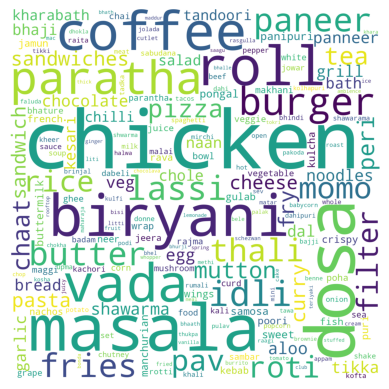

In [221]:
dishes=''
for word in data['dish_liked']:
    words=word.split()
    # Converts each token into lowercase
    for i in range(len(words)):
        words[i] = words[i].lower()
    dishes=dishes+ " ".join(words)+" "
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
plt.imshow(wordcloud)
plt.axis("off")

In [222]:
def produce_wordcloud(rest):

    plt.figure(figsize=(20,30))
    for i,restaurant in enumerate(rest):
        plt.subplot(3,3,i+1)
        dishes=''
        data=df[df['rest_type']==restaurant]
        for word in data['dish_liked']:
            words=word.split()
            # Converts each token into lowercase
            for i in range(len(words)):
                words[i] = words[i].lower()
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant)
        plt.axis("off")

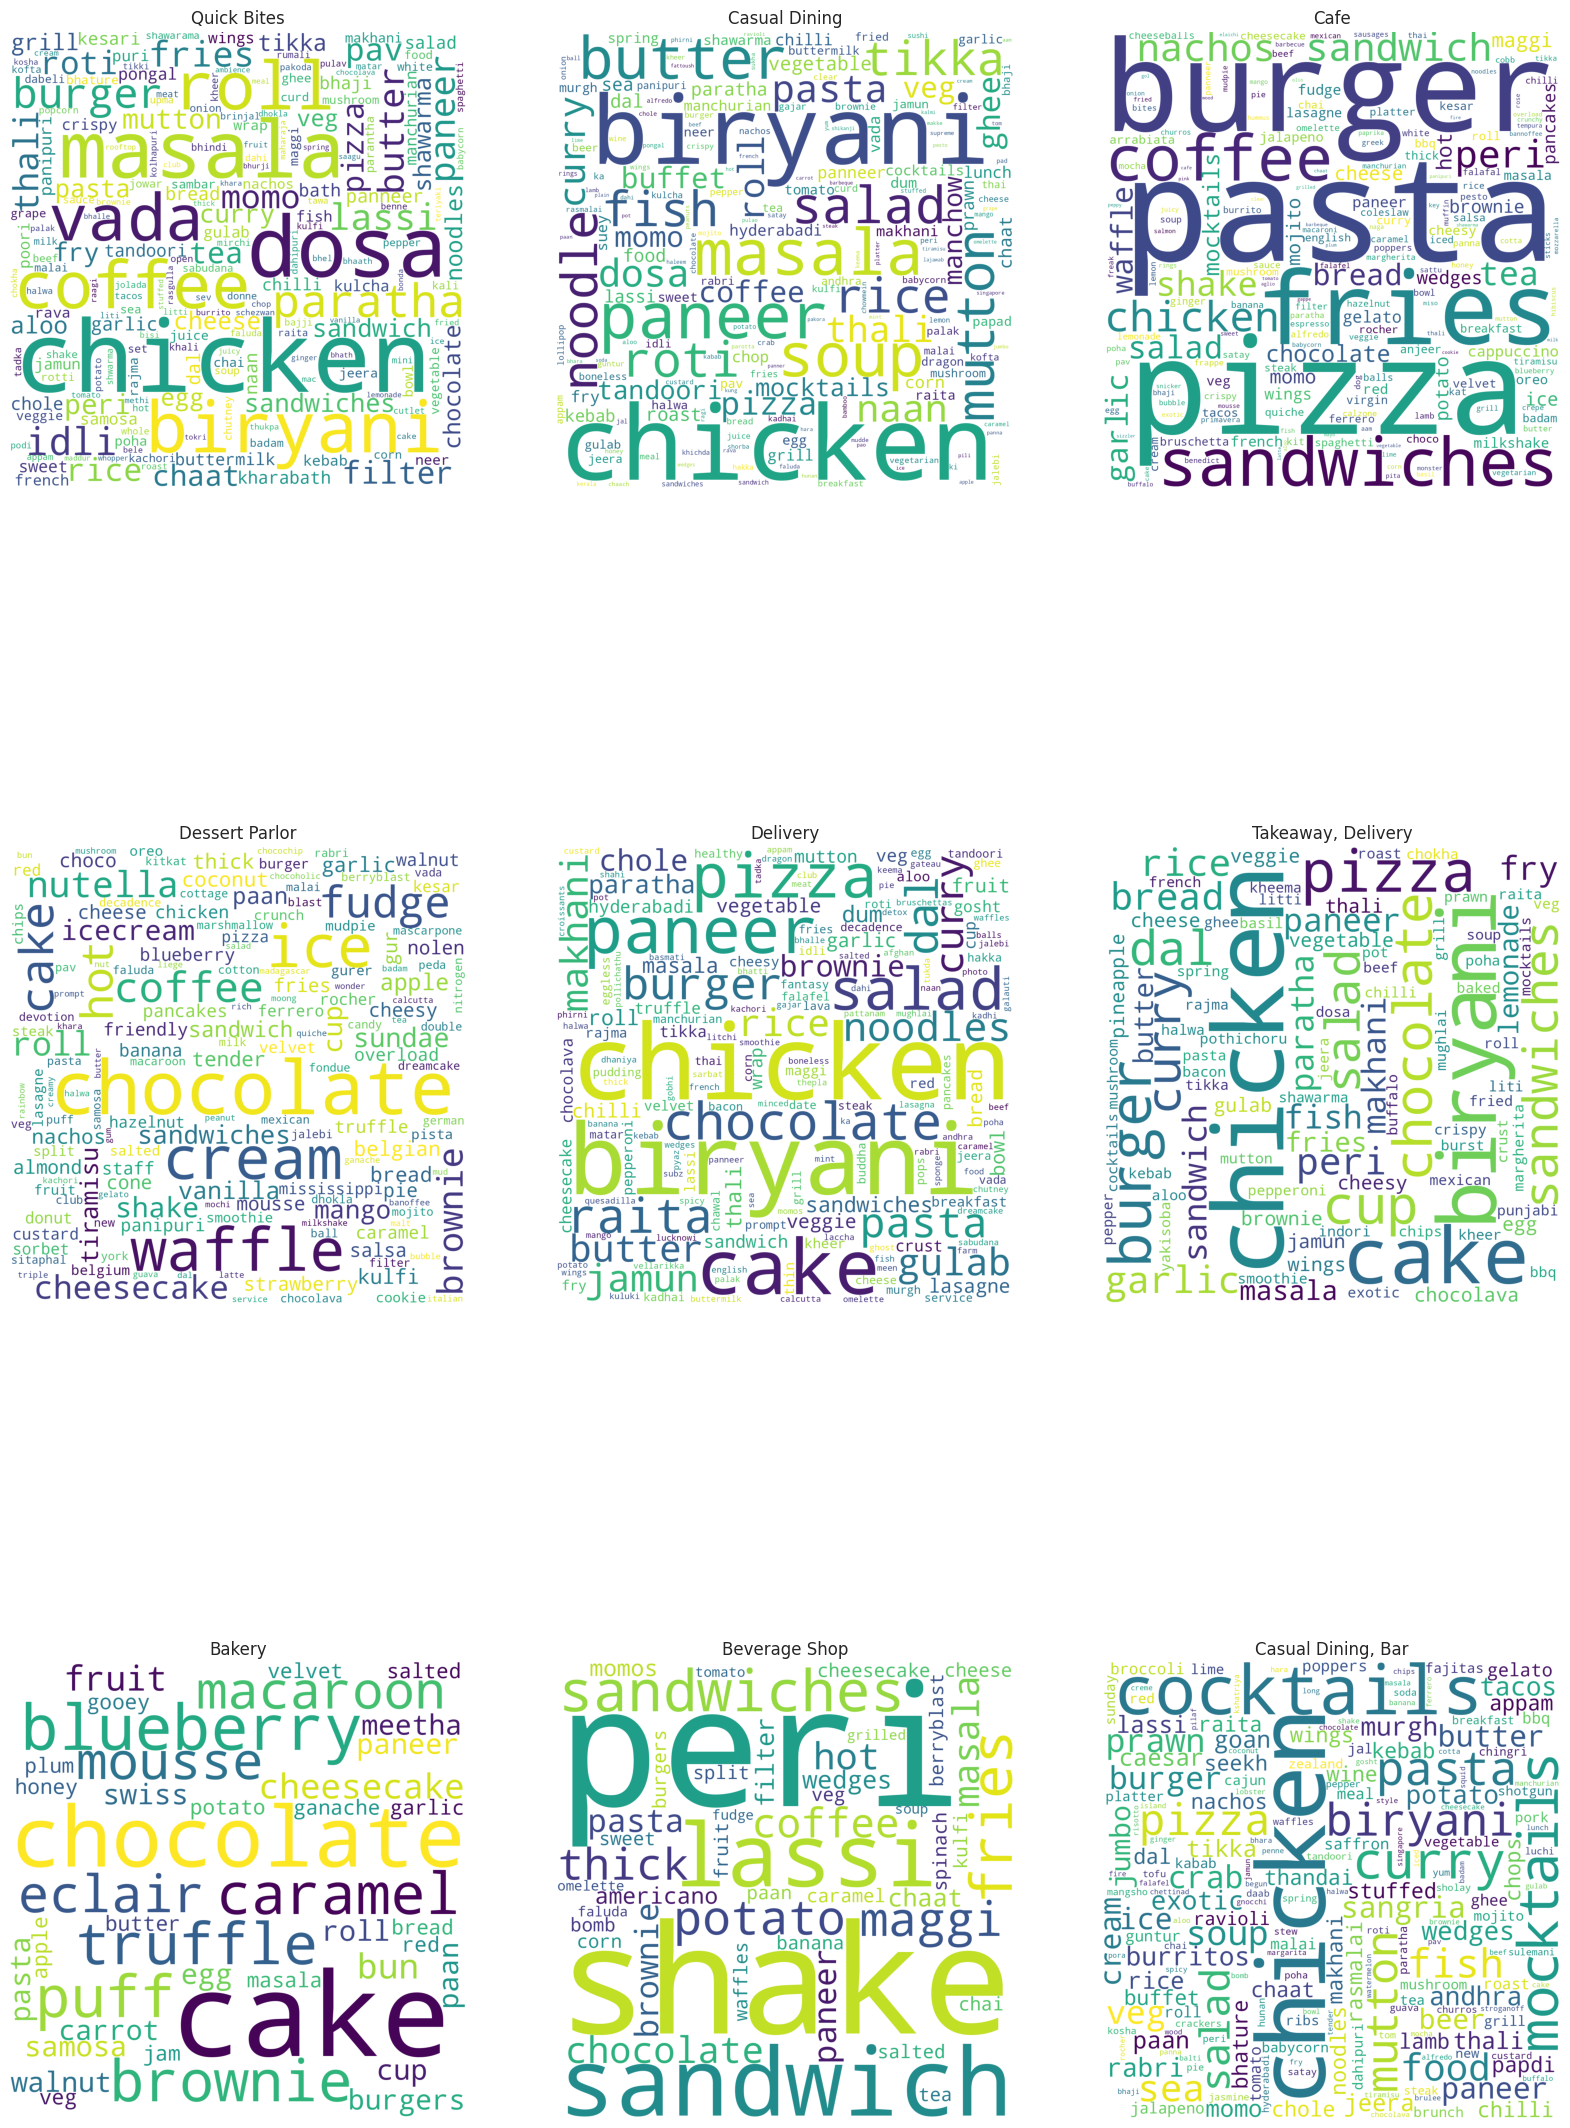

In [223]:
stopwords = set(STOPWORDS)
produce_wordcloud(rest)

**Analysing reviews of a particular restaurant**

In [224]:
df.head()


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  \
0          Buffet    Banashankari   
1          Buffet    Banashankari   
2          Buffet    Banashankari   
3          Buffet    Banashankari   
4          Buffet    Banashankari   

                                   update_dish_liked  
0  [Pasta,  Lunch Buffet,  Masala Papad,  Paneer ...  
1  [Momos,  Lunch Buffet,  Chocolate Nirvana,  Th...  
2  [Churros,  Cannelloni,  Minestrone Soup,  Hot ...  
3                                      [Masala Dosa]  
4                             [Panipuri,  Gol Gappe]

In [225]:
df['reviews_list'][0]


'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [226]:
data=df['reviews_list'][0].lower()
data

'[(\'rated 4.0\', \'rated\\n  a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.\'), (\'rated 4.0\', \'rated\\n  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.\\ncheers\'), (\'rated 2.0\', \'rated\\n  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this plac

In [227]:
import re
data2=re.sub('[^a-zA-Z]', ' ',data)
data2

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [228]:
data3=re.sub('rated', ' ',data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [229]:
data4=re.sub('x',' ',data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

**Remove multiple spaces**

In [231]:
re.sub(' +',' ',data4)

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

**Analyse review of a particular restaurant**

In [232]:
dataset=df[df['rest_type']=='Quick Bites']


In [233]:
type(dataset['reviews_list'][3])


str

In [234]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)


(-0.5, 799.5, 799.5, -0.5)

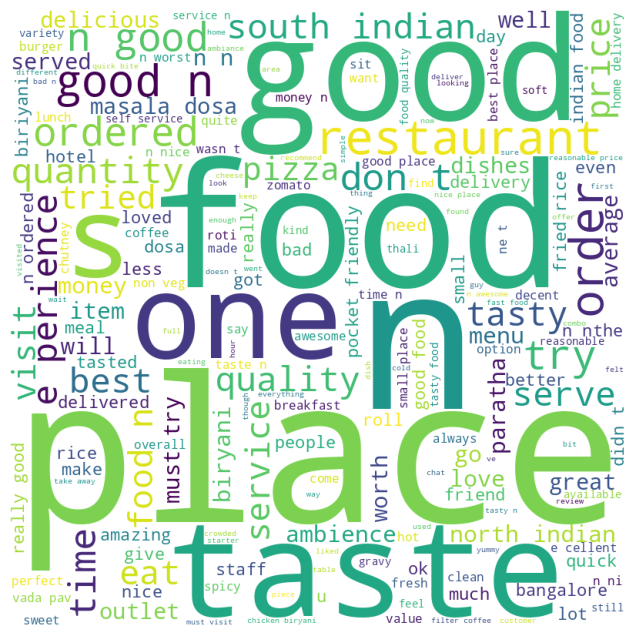

In [235]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_review)
# plot the WordCloud image
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")

In [236]:
def importance(restaurant):
    dataset=df[df['rest_type']==restaurant]
    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)
    wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = set(STOPWORDS),
            min_font_size = 10).generate(total_review)
    # plot the WordCloud image
    plt.figure(figsize = (8, 8))
    plt.imshow(wordcloud)
    plt.axis("off")

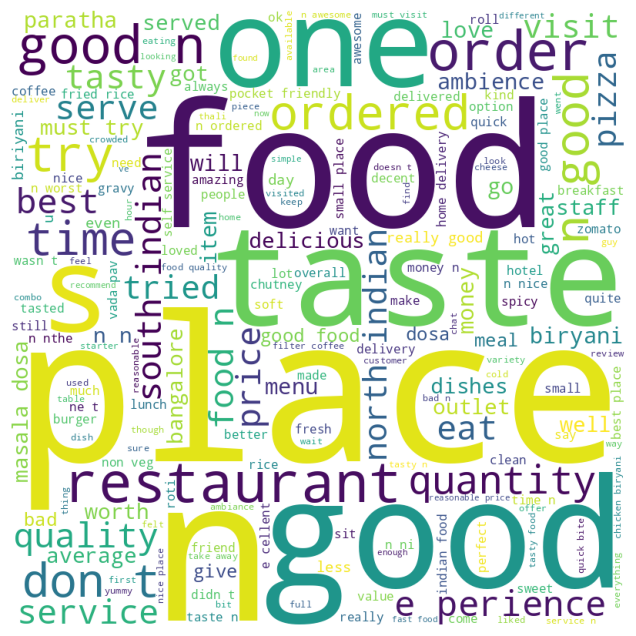

In [237]:
importance('Quick Bites')